Step1. Import the necessary packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import itertools
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import plotly.graph_objects as go
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

/Users/lucaalbertini/Desktop/JPMorgan_Job/JPmorgvenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Step2. Load and Display the data from the Nat_Gas.csv

In [3]:
natgas = pd.read_csv("Nat_Gas.csv")
natgas

,Dates,Prices
0,10/31/20,10.10
1,11/30/20,10.30
2,12/31/20,11.00
3,1/31/21,10.90
4,2/28/21,10.90
5,3/31/21,10.90
6,4/30/21,10.40
7,5/31/21,9.84
8,6/30/21,10.00
9,7/31/21,10.10


Step3. Check data type & change them into the right format

In [4]:
#check columns type
print(natgas.dtypes)
#transform into a df
natgasdf = pd.DataFrame(natgas)
#convert date into datetime
natgasdf["Dates"] = pd.to_datetime(natgasdf["Dates"], format = "%m/%d/%y")
#check
print(natgasdf.dtypes)
natgasdf

Dates      object
Prices    float64
dtype: object
Dates     datetime64[ns]
Prices           float64
dtype: object


,Dates,Prices
0,2020-10-31,10.10
1,2020-11-30,10.30
2,2020-12-31,11.00
3,2021-01-31,10.90
4,2021-02-28,10.90
5,2021-03-31,10.90
6,2021-04-30,10.40
7,2021-05-31,9.84
8,2021-06-30,10.00
9,2021-07-31,10.10


Step4. Check for missing data

In [5]:
print(natgasdf.isnull().sum())
print("No missing data")

Dates     0
Prices    0
dtype: int64
No missing data


Step5. Set the "Dates" column as index

In [6]:
natgasdf.set_index("Dates")

,Prices
Dates,
2020-10-31,10.10
2020-11-30,10.30
2020-12-31,11.00
2021-01-31,10.90
2021-02-28,10.90
2021-03-31,10.90
2021-04-30,10.40
2021-05-31,9.84
2021-06-30,10.00


Step6. Define a function (dateprice) to display the Prices at a given date

In [7]:
#build a new editable database
natgasdf2 = natgasdf
natgasdf2['month'] = natgasdf2['Dates'].dt.strftime('%m-%Y')
#define the function
def dateprice(dateMY):
    # Check if the entered date exists in the 'month' column
    if dateMY in natgasdf2['month'].values:
        # Print the Prices for rows where the 'month' matches dateMY
        print(natgasdf2.loc[natgasdf2['month'] == dateMY, 'Prices'].values[0])
    else:
        print("No data found for the specified date.")

Step7. Insert a date (format MM-YYYY) to get the price during that month

In [8]:
print("The Natural Gas' price on that date was:")
dateMY = input()
dateprice(dateMY)

The Natural Gas' price on that date was:
11.0


Step8. Descriptive Statistics about the prices

In [9]:
print("Prices descriptive Statistics:")
print("-------------------------------")
print(natgasdf["Prices"].describe())

Prices descriptive Statistics:
-------------------------------
count    48.000000
mean     11.207083
std       0.757897
min       9.840000
25%      10.650000
50%      11.300000
75%      11.625000
max      12.800000
Name: Prices, dtype: float64


Step9. Plot the Prices to spot general trends

<Axes: title={'center': 'Monthly Natural Gas Prices 2020-2024'}, xlabel='Date', ylabel='Price'>

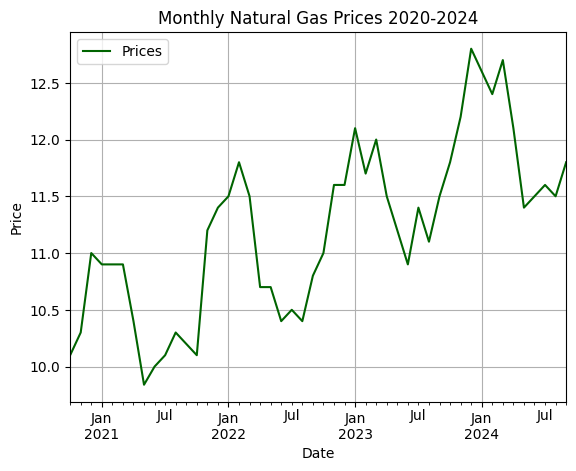

In [10]:
natgasdf.plot(
    x='Dates',
    y='Prices',
    color='darkgreen',
    grid=True,
    xlabel='Date',
    ylabel='Price',
    title='Monthly Natural Gas Prices 2020-2024'
)

2 things worth noting:
- 1. Upward trend from 2020 to 2024
- 2. Some sort of seasonality (higher on coolest months, lower on the hottest)

What can influece demand for natural gas?
- seasonal demand
- changes in supply
- economic condition
- global energy policies

Step10. Test for Stationarity (ADF test)

In [11]:
# Set a function to perform and interpret the ADF
def adf_test(series, lag):
    result = adfuller(series, autolag=lag)  #lag can be chosen by the user
    print(f"Lag selection by: {lag}")
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}, {value}')
    
    # Check for stationarity
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is non-stationary.")

#test for prices
adf_test(natgasdf["Prices"], "BIC")

Lag selection by: BIC
ADF Statistic: 0.21807686169999388
p-value: 0.973257438844869
Critical Values:
   1%, -3.6209175221605827
   5%, -2.9435394610388332
   10%, -2.6104002410518627
The series is non-stationary.


Step11. Differentiate the Prices

In [12]:
natgasdf2["Diff"] = natgasdf2["Prices"].diff()
natgasdf2

,Dates,Prices,month,Diff
0,2020-10-31,10.10,10-2020,NaN
1,2020-11-30,10.30,11-2020,0.20
2,2020-12-31,11.00,12-2020,0.70
3,2021-01-31,10.90,01-2021,-0.10
4,2021-02-28,10.90,02-2021,0.00
5,2021-03-31,10.90,03-2021,0.00
6,2021-04-30,10.40,04-2021,-0.50
7,2021-05-31,9.84,05-2021,-0.56
8,2021-06-30,10.00,06-2021,0.16
9,2021-07-31,10.10,07-2021,0.10


Step12. Plot the differentiated prices

<Axes: title={'center': 'Monthly Natural Gas Prices 2020-2024'}, xlabel='Date', ylabel='Differentiated Price'>

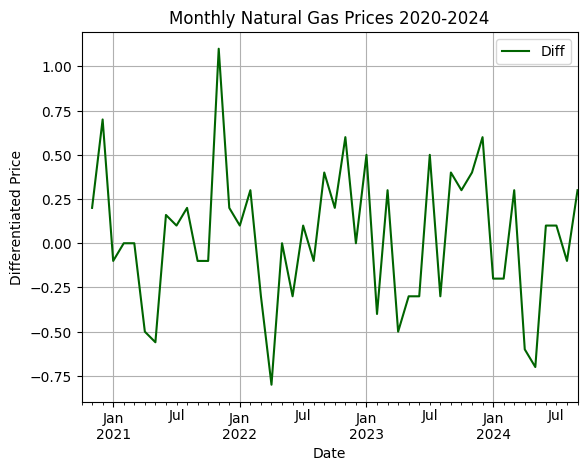

In [13]:
natgasdf2.plot(
    x='Dates',
    y='Diff',
    color='darkgreen',
    grid=True,
    xlabel='Date',
    ylabel='Differentiated Price',
    title='Monthly Natural Gas Prices 2020-2024'
)

Step13. Check stationarity through ADF test

In [14]:
# Create a variable that holds the 'Diff' column without the first NaN
diff_without_nan = natgasdf2["Diff"].dropna().reset_index(drop=True)
# test for adf
adf_test(diff_without_nan, "BIC")

Lag selection by: BIC
ADF Statistic: -6.844773557477356
p-value: 1.7541696852939828e-09
Critical Values:
   1%, -3.6209175221605827
   5%, -2.9435394610388332
   10%, -2.6104002410518627
The series is stationary.


Now the series is stationariy. Include the differentiation into the model.

Step14. Plot both autocorrelation and partial-autocorrelation

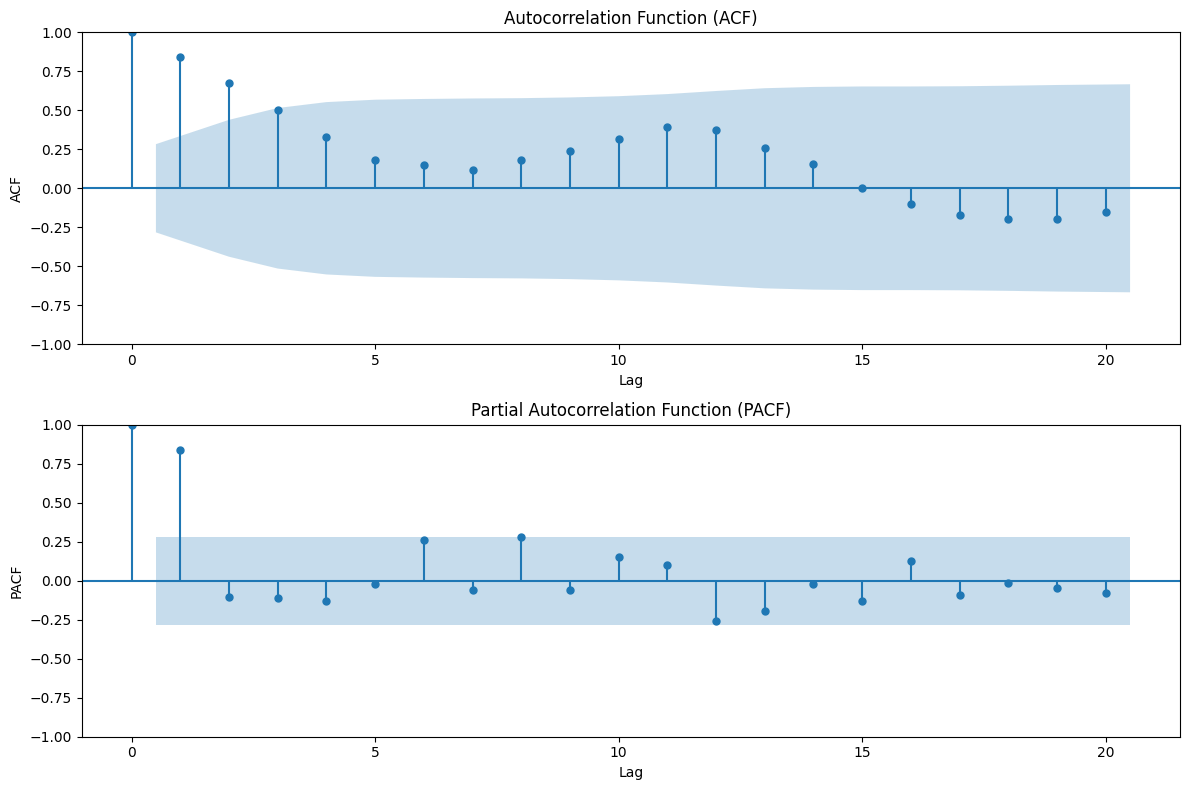

In [15]:
# Set up the figure for ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Plot ACF
plot_acf(natgasdf["Prices"], lags=20, ax=ax[0])  # Specify the axes to use
ax[0].set_title("Autocorrelation Function (ACF)")
ax[0].set_xlabel("Lag")
ax[0].set_ylabel("ACF")

# Plot PACF
plot_pacf(natgasdf["Prices"], lags=20, ax=ax[1])  # Specify the axes to use
ax[1].set_title("Partial Autocorrelation Function (PACF)")
ax[1].set_xlabel("Lag")
ax[1].set_ylabel("PACF")

# Show plots
plt.tight_layout()
plt.show()

According to pacf and acf, p and q could be:

- p: 1, 2, 3, 4
- q: 1, 2

While d = 1. 

Step15. Split data into training and testing

In [16]:
# Get last 10 (around 20%) rows of data and store them into a new variable 
testing = natgasdf[len(natgasdf)-10:]
#Get all rows except the last 10
training = natgasdf[:-12]
#show both
print(training.head())
print(testing)

       Dates  Prices    month  Diff
0 2020-10-31    10.1  10-2020   NaN
1 2020-11-30    10.3  11-2020   0.2
2 2020-12-31    11.0  12-2020   0.7
3 2021-01-31    10.9  01-2021  -0.1
4 2021-02-28    10.9  02-2021   0.0
        Dates  Prices    month  Diff
38 2023-12-31    12.8  12-2023   0.6
39 2024-01-31    12.6  01-2024  -0.2
40 2024-02-29    12.4  02-2024  -0.2
41 2024-03-31    12.7  03-2024   0.3
42 2024-04-30    12.1  04-2024  -0.6
43 2024-05-31    11.4  05-2024  -0.7
44 2024-06-30    11.5  06-2024   0.1
45 2024-07-31    11.6  07-2024   0.1
46 2024-08-31    11.5  08-2024  -0.1
47 2024-09-30    11.8  09-2024   0.3


Step16. Fit a SARIMA model on the training.

In [17]:
# Define the SARIMA model
p, d, q = 1, 1, 1   # Non-seasonal parameters
P, D, Q, m = 0, 1, 0, 12  # Seasonal parameters

# Fit the model
SARIMA1 = sm.tsa.SARIMAX(training['Prices'], order=(p, d, q), seasonal_order=(P, D, Q, m))
SARIMA1_fit = SARIMA1.fit()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.83970D-01    |proj g|=  1.74208D-01

At iterate    5    f=  1.64126D-01    |proj g|=  1.81112D-02

At iterate   10    f=  1.52726D-01    |proj g|=  1.89809D-02

At iterate   15    f=  1.51306D-01    |proj g|=  2.83962D-03

At iterate   20    f=  1.51070D-01    |proj g|=  9.26878D-03

At iterate   25    f=  1.51050D-01    |proj g|=  1.72104D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     39      1     0     0   

 This problem is unconstrained.


In [18]:
print(SARIMA1_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                              Prices   No. Observations:                   36
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                  -5.438
Date:                             Fri, 01 Nov 2024   AIC                             16.875
Time:                                     23:58:35   BIC                             20.282
Sample:                                          0   HQIC                            17.732
                                              - 36                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1106      0.366     -0.302      0.763      -0.829       0.608
ma.L1         -0.9952      

Step17. Check the residuals diagnostics

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.96647D-01    |proj g|=  2.43606D-01


 This problem is unconstrained.
/Users/lucaalbertini/Desktop/JPMorgan_Job/JPmorgvenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate    5    f=  1.88161D-01    |proj g|=  1.20813D-02

At iterate   10    f=  1.86636D-01    |proj g|=  7.09366D-03

At iterate   15    f=  1.84526D-01    |proj g|=  7.16053D-02

At iterate   20    f=  1.66911D-01    |proj g|=  2.50571D-02

At iterate   25    f=  1.59899D-01    |proj g|=  8.27916D-03

At iterate   30    f=  1.57450D-01    |proj g|=  2.34679D-03

At iterate   35    f=  1.57024D-01    |proj g|=  1.30842D-02

At iterate   40    f=  1.57014D-01    |proj g|=  1.55214D-03

At iterate   45    f=  1.57013D-01    |proj g|=  6.15409D-04

At iterate   50    f=  1.57013D-01    |proj g|=  1.86293D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

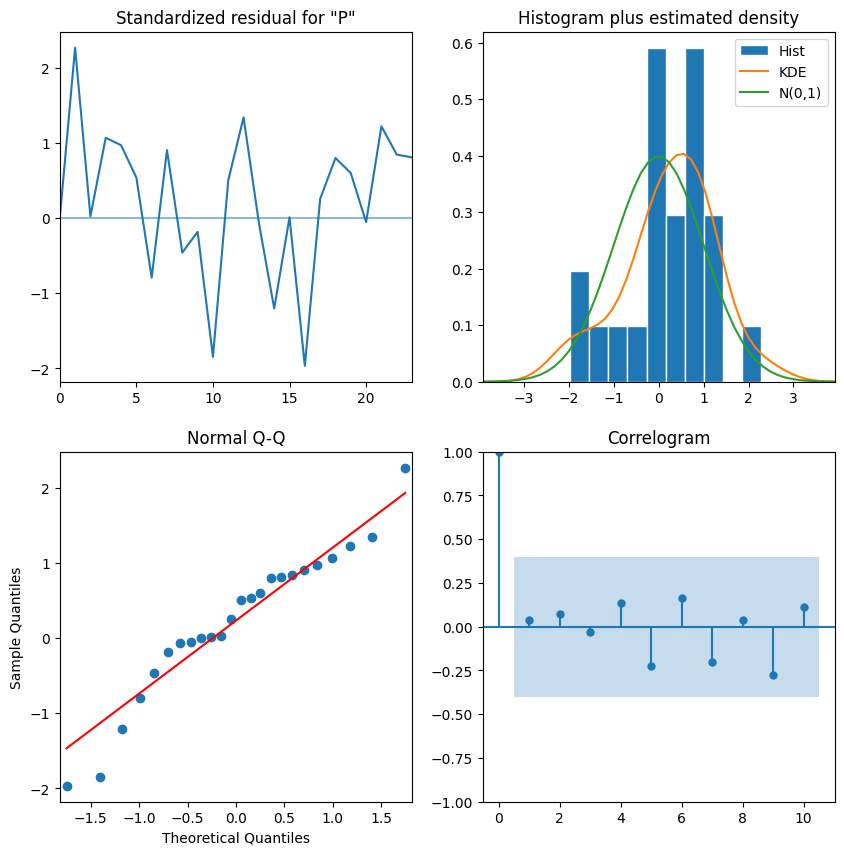

In [19]:
(
    sm.tsa.SARIMAX(training["Prices"], order=(5,0,1), seasonal_order=(0, 1, 0, 12))
    ).fit(
        ).plot_diagnostics(figsize=(10,10))
plt.show()


Step18. Make Predictions

In [20]:
# Make predictions
start = len(training["Prices"])
end = len(training["Prices"]) + len(testing["Prices"]) - 1
predictions = SARIMA1_fit.predict(start=start, end=end)
#print predictions
print(predictions)

36    11.510158
37    12.131163
38    12.128838
39    12.629096
40    12.229067
41    12.529070
42    12.029070
43    11.729070
44    11.429070
45    11.929070
Name: predicted_mean, dtype: float64


Step19. Compute Accuracy Measures

In [21]:
#set up a function to compute accuracy measures

# Define accuracy measures function
def accuracy_measures(series, prediction):
    # Extract numerical values for testing series (avoiding any datetime data type issues)
    series_values = series.values  # Extracts only the numerical values

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(series_values, prediction)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(series_values, prediction)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    # Calculate Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((series_values - prediction) / series_values)) * 100

    # Calculate R-squared (R²)
    r2 = r2_score(series_values, prediction)

    # Calculate Standard Error of Regression (SER)
    n = len(series_values)  # Number of observations
    k = 1  # Number of predictors (for ARIMA, it's usually 1)
    ser = np.sqrt(np.sum(np.square(series_values - prediction)) / (n - k - 1))

    # Display the metrics
    print("Fundamental metrics are:")
    print("=============================================")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
    print(f"R-squared (R²): {r2}")
    print(f"Standard Error of Regression (SER): {ser}")
    
print(accuracy_measures(testing["Prices"], predictions))


Fundamental metrics are:
Mean Absolute Error (MAE): 0.4217023033874597
Mean Squared Error (MSE): 0.3571779777522591
Root Mean Squared Error (RMSE): 0.5976436879548375
Mean Absolute Percentage Error (MAPE): 3.4937586655327513%
R-squared (R²): -0.32092447393586987
Standard Error of Regression (SER): 0.6681859562953444
None


While the MAPE suggests that the model performs reasonably well in relative error terms, the negative R² and moderate error values (RMSE and SER) indicate that the current SARIMA configuration may not be capturing the data’s structure effectively. To improve, consider revisiting the seasonal and non-seasonal parameters or testing alternative models

Step20. Model 2

In [22]:
# Fit the model
SARIMA2 = sm.tsa.SARIMAX(training['Prices'], order=(2, 1, 2), seasonal_order=(P, D, Q, m))
SARIMA2_fit = SARIMA2.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.63074D-01    |proj g|=  1.65398D-01

At iterate    5    f=  1.55417D-01    |proj g|=  2.03026D-02

At iterate   10    f=  1.47646D-01    |proj g|=  2.88443D-02

At iterate   15    f=  1.45457D-01    |proj g|=  6.87208D-03

At iterate   20    f=  1.44675D-01    |proj g|=  7.36599D-04

At iterate   25    f=  1.44613D-01    |proj g|=  2.07599D-03

At iterate   30    f=  1.44600D-01    |proj g|=  1.37089D-03

At iterate   35    f=  1.44595D-01    |proj g|=  3.10159D-03

At iterate   40    f=  1.44592D-01    |proj g|=  9.72265D-04

At iterate   45    f=  1.44591D-01    |proj g|=  5.66094D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


In [23]:
print(SARIMA2_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                              Prices   No. Observations:                   36
Model:             SARIMAX(2, 1, 2)x(0, 1, [], 12)   Log Likelihood                  -5.205
Date:                             Fri, 01 Nov 2024   AIC                             20.411
Time:                                     23:58:36   BIC                             26.088
Sample:                                          0   HQIC                            21.838
                                              - 36                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5191      1.538     -0.338      0.736      -3.533       2.494
ar.L2         -0.1879      

In [24]:
# Make predictions
predictions2 = SARIMA2_fit.predict(start=start, end=end)
#print predictions
print(predictions2)

36    11.507328
37    12.107430
38    12.143582
39    12.624797
40    12.227755
41    12.529749
42    12.028158
43    11.728609
44    11.428674
45    11.928556
Name: predicted_mean, dtype: float64


In [25]:
accuracy_measures(testing["Prices"], predictions2)

Fundamental metrics are:
Mean Absolute Error (MAE): 0.42310159004646036
Mean Squared Error (MSE): 0.3594791268933814
Root Mean Squared Error (RMSE): 0.5995657819567269
Mean Absolute Percentage Error (MAPE): 3.504528714370001%
R-squared (R²): -0.3294346408778903
Standard Error of Regression (SER): 0.6703349227190292


Step21. Plot to see how they do beahave

In [26]:
# Append the last point of training to the start of test and predictions
last_training_point = training.iloc[-1]
# Create new dataframes for test and predictions with an additional first point
test_with_last_training = pd.concat([last_training_point.to_frame().T, testing], ignore_index=True)
#for pred1
pred1 = pd.Series([last_training_point["Prices"]] + list(predictions), index=test_with_last_training["Dates"])
#for pred2
pred2 = pd.Series([last_training_point["Prices"]] + list(predictions2), index=test_with_last_training["Dates"])
print(pred2)

pred1.index = pd.to_datetime(pred1.index)
pred2.index = pd.to_datetime(pred2.index)

Dates
2023-09-30    11.500000
2023-12-31    11.507328
2024-01-31    12.107430
2024-02-29    12.143582
2024-03-31    12.624797
2024-04-30    12.227755
2024-05-31    12.529749
2024-06-30    12.028158
2024-07-31    11.728609
2024-08-31    11.428674
2024-09-30    11.928556
dtype: float64


/Users/lucaalbertini/Desktop/JPMorgan_Job/JPmorgvenv/lib/python3.12/site-packages/pandas/core/indexes/base.py:7631: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(index_like, name=name, copy=copy)


In [27]:
# Create an interactive figure
fig = go.Figure()

# Add training data as a line plot
fig.add_trace(go.Scatter(
    x=training["Dates"],
    y=training["Prices"],
    mode='lines',
    name='Training Data',
    line=dict(color='mediumblue')
))

# Add test data as a line plot with smooth transition from training data
fig.add_trace(go.Scatter(
    x=test_with_last_training["Dates"],
    y=test_with_last_training["Prices"],
    mode='lines',
    name='Test Data',
    line=dict(color='lightblue')
))

# Add SARIMA1 predictions as a line plot with smooth transition from training data
fig.add_trace(go.Scatter(
    x=pred1.index,
    y=pred1,
    mode='lines',
    name='SARIMA1',
    line=dict(color='darkred')
))

# Add SARIMA2 predictions as a line plot with smooth transition from training data
fig.add_trace(go.Scatter(
    x=pred2.index,
    y=pred2,
    mode='lines',
    name='SARIMA2',
    line=dict(color='darkgreen')
))

# Update layout for the interactive plot
fig.update_layout(
    title='SARIMA Forecast vs Actual',
    xaxis_title='Year',
    yaxis_title='NatGas Prices',
    legend_title='Data',
    template='plotly_white',
    hovermode='x unified'  # Show hover information for all traces at the same x-value
)

# Save the figure to the img directory
#save_plotly_figure(fig, 'img/ARIMAtest', format='png')

# Display the interactive plot
fig.show()

Step 22. Results are not Good. Let's try a prophet model

In [28]:
#filter the training to keep just the 2 useful columns
trainingRed = training[["Dates", "Prices"]]
trainingRed = trainingRed.rename(columns={'Dates':'ds', 'Prices':'y'})
print(trainingRed)

#build the model (Prophet)
propMod = Prophet(seasonality_mode='multiplicative', mcmc_samples=360)
#fit the model
propMod.fit(trainingRed)
fut = propMod.make_future_dataframe(periods=24, freq='ME')
forecast = propMod.predict(fut)

23:58:37 - cmdstanpy - INFO - CmdStan start processing


           ds      y
0  2020-10-31  10.10
1  2020-11-30  10.30
2  2020-12-31  11.00
3  2021-01-31  10.90
4  2021-02-28  10.90
5  2021-03-31  10.90
6  2021-04-30  10.40
7  2021-05-31   9.84
8  2021-06-30  10.00
9  2021-07-31  10.10
10 2021-08-31  10.30
11 2021-09-30  10.20
12 2021-10-31  10.10
13 2021-11-30  11.20
14 2021-12-31  11.40
15 2022-01-31  11.50
16 2022-02-28  11.80
17 2022-03-31  11.50
18 2022-04-30  10.70
19 2022-05-31  10.70
20 2022-06-30  10.40
21 2022-07-31  10.50
22 2022-08-31  10.40
23 2022-09-30  10.80
24 2022-10-31  11.00
25 2022-11-30  11.60
26 2022-12-31  11.60
27 2023-01-31  12.10
28 2023-02-28  11.70
29 2023-03-31  12.00
30 2023-04-30  11.50
31 2023-05-31  11.20
32 2023-06-30  10.90
33 2023-07-31  11.40
34 2023-08-31  11.10
35 2023-09-30  11.50


chain 1 |          | 00:00 Status





chain 1 |████      | 00:00 Iteration:   1 / 360 [  0%]  (Warmup)


chain 1 |██████    | 00:00 Iteration: 100 / 360 [ 27%]  (Warmup)


chain 1 |████████  | 00:01 Iteration: 181 / 360 [ 50%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                     
chain 2 |██████████| 00:01 Sampling completed                     
chain 3 |██████████| 00:01 Sampling completed                     
chain 4 |██████████| 00:01 Sampling completed                     


23:58:39 - cmdstanpy - INFO - CmdStan done processing.
23:58:39 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-running with show_console=True if the above output is unclear!
23:58:39 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 2 had 1 iterations at max treedepth (0.6%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


Step23. Plot the results

In [29]:
# Generate the Prophet plotly figure
pro = plot_plotly(propMod, forecast)

# Update the figure's layout to customize the legend
pro.update_layout(
    title="Prophet Forecast vs actual values",
    xaxis_title="Date",
    yaxis_title="Price",
    legend_title="Data Series",  # Adding title to the legend
    legend=dict(
        x=0.02,
        y=0.98,
        traceorder="normal",
        bgcolor='rgba(255, 255, 255, 0.5)',
        bordercolor="black",
        borderwidth=1,
    )
)

# Show the customized plot
pro.show()

Step24. Build a df with actual and estimated values and a function to display the prices at a given date.

In [30]:
# Original actual data in `natgasdf`
actual_df = natgasdf[['Dates', 'Prices']].copy()

# Forecast data from Prophet
forecast_df = forecast[['ds', 'yhat']].copy()
forecast_df.columns = ['Dates', 'Predicted']

# Merge actual and forecast data on the 'Dates' column
combined_df = pd.merge(actual_df, forecast_df, on='Dates', how='outer')

# Reorder columns for clarity
combined_df = combined_df[['Dates', 'Prices', 'Predicted']]

# Display the combined DataFrame
print(combined_df)

        Dates  Prices  Predicted
0  2020-10-31   10.10   9.956850
1  2020-11-30   10.30  10.368719
2  2020-12-31   11.00  11.015657
3  2021-01-31   10.90  10.872881
4  2021-02-28   10.90  11.016976
5  2021-03-31   10.90  10.898794
6  2021-04-30   10.40  10.303015
7  2021-05-31    9.84   9.924964
8  2021-06-30   10.00  10.028471
9  2021-07-31   10.10  10.071447
10 2021-08-31   10.30  10.255484
11 2021-09-30   10.20  10.238704
12 2021-10-31   10.10  10.403138
13 2021-11-30   11.20  11.040577
14 2021-12-31   11.40  11.359729
15 2022-01-31   11.50  11.513079
16 2022-02-28   11.80  11.489464
17 2022-03-31   11.50  11.483531
18 2022-04-30   10.70  10.854052
19 2022-05-31   10.70  10.551448
20 2022-06-30   10.40  10.404773
21 2022-07-31   10.50  10.608626
22 2022-08-31   10.40  10.538575
23 2022-09-30   10.80  10.749958
24 2022-10-31   11.00  10.852955
25 2022-11-30   11.60  11.687367
26 2022-12-31   11.60  11.620187
27 2023-01-31   12.10  12.091430
28 2023-02-28   11.70  11.896402
29 2023-03

In [31]:
combined_df.to_csv("Act&Pred_prices.csv", index = False)

Step25. Prophet Accuracy Measures

In [32]:

#remove rows with NaN
filtered_df = combined_df.iloc[:48].dropna(subset=['Prices', 'Predicted'])
#transform column into series
actual_prices = filtered_df['Prices']
predicted_prices = filtered_df['Predicted']

#Calculate accuracy measures for the Prophet model
accuracy_measures(actual_prices, predicted_prices)

Fundamental metrics are:
Mean Absolute Error (MAE): 0.15836895673013898
Mean Squared Error (MSE): 0.060119933205839075
Root Mean Squared Error (RMSE): 0.24519366469352155
Mean Absolute Percentage Error (MAPE): 1.37273009577313%
R-squared (R²): 0.8931090007616123
Standard Error of Regression (SER): 0.2504672500452372


The MAE and MAPE values indicate relatively low errors, while the R² value shows that the model explains a significant portion of the variance in the data. The RMSE also reinforces the overall accuracy of your predictions. This suggests that the Prophet model is reliable for forecasting in the context of your dataset.

Step26. Build a function to display the values (actual vs estimated)

In [33]:
#build a new editable database
combined_df['month'] = combined_df['Dates'].dt.strftime('%m-%Y')
#define the function
def actual_and_estimates(month):
    # Check if the entered month exists in the 'month' column
    if month in combined_df['month'].values:
        # Print the Prices and Predicted values for rows where the 'month' matches
        results = combined_df.loc[combined_df['month'] == month, ['Prices', 'Predicted']]
             
        # Print the actual and estimated values for each row
        for index, row in results.iterrows():
            print(f"Natural gas prices (actual and estimated) for {month} are:")
            print(f"Actual value is {row['Prices']} and estimated value is {row['Predicted']}.")

    else:
        print("No data found for the specified month.")

In [34]:
print("Type a date in MM-YYYY format:")
monthinput = input()
print(f"The chosen date is: {monthinput}")
print("---------------------------------")

actual_and_estimates(monthinput)

Type a date in MM-YYYY format:
The chosen date is: 10-2022
---------------------------------
Natural gas prices (actual and estimated) for 10-2022 are:
Actual value is 11.0 and estimated value is 10.852954932322795.
